# Problem Definition

In [1]:
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import copy
import math
from collections import defaultdict
import networkx as nx

In [2]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

In [3]:
class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

In [4]:
class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

In [5]:
def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    """
    Generates a synthetic dataset for the Job Shop Scheduling Problem.

    Parameters:
    - num_jobs: Number of jobs to generate.
    - num_machines: Number of machines available.
    - min_operations: Minimum number of operations per job.
    - max_operations: Maximum number of operations per job.
    - min_time: Minimum processing time for an operation.
    - max_time: Maximum processing time for an operation.

    Returns:
    - A dictionary containing lists of jobs, machines, and operations.
    """
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Randomly assign machines to operations without repetition
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_id in range(num_operations):
            machine_id = machine_sequence[op_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_id,
                machine_id=machine_id,
                processing_time=processing_time
            )
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [6]:
def print_dataset(dataset: Dict[str, List]):
    print("Machines:")
    for machine in dataset['machines']:
        print(f"  {machine}")

    print("\nJobs and their Operations:")
    for job in dataset['jobs']:
        print(f"Job {job.job_id}:")
        for operation in job.operations:
            print(f"  {operation}")

In [7]:
# Parameters for dataset generation
NUM_JOBS = 5           # Total number of jobs
NUM_MACHINES = 4       # Total number of machines
MIN_OPERATIONS = 3     # Minimum operations per job
MAX_OPERATIONS = 5     # Maximum operations per job
MIN_TIME = 1           # Minimum processing time
MAX_TIME = 10          # Maximum processing time

# Generate the dataset
dataset = generate_synthetic_jssp(
    num_jobs=NUM_JOBS,
    num_machines=NUM_MACHINES,
    min_operations=MIN_OPERATIONS,
    max_operations=MAX_OPERATIONS,
    min_time=MIN_TIME,
    max_time=MAX_TIME
)

# Display the dataset
print_dataset(dataset)

Machines:
  Machine(id=0)
  Machine(id=1)
  Machine(id=2)
  Machine(id=3)

Jobs and their Operations:
Job 0:
  Operation(job=0, op=0, machine=0, time=1)
  Operation(job=0, op=1, machine=3, time=2)
  Operation(job=0, op=2, machine=1, time=6)
  Operation(job=0, op=3, machine=2, time=7)
Job 1:
  Operation(job=1, op=0, machine=3, time=10)
  Operation(job=1, op=1, machine=0, time=6)
  Operation(job=1, op=2, machine=2, time=10)
Job 2:
  Operation(job=2, op=0, machine=1, time=1)
  Operation(job=2, op=1, machine=2, time=2)
  Operation(job=2, op=2, machine=3, time=3)
  Operation(job=2, op=3, machine=0, time=6)
Job 3:
  Operation(job=3, op=0, machine=2, time=3)
  Operation(job=3, op=1, machine=1, time=8)
  Operation(job=3, op=2, machine=3, time=9)
  Operation(job=3, op=3, machine=3, time=8)
  Operation(job=3, op=4, machine=1, time=4)
Job 4:
  Operation(job=4, op=0, machine=3, time=6)
  Operation(job=4, op=1, machine=3, time=5)
  Operation(job=4, op=2, machine=3, time=3)
  Operation(job=4, op=3, 

# Visualize the Problem

In [8]:
def visualize_job_sequences(jobs):
    """
    Creates a directed graph for each job to show the sequence of operations.
    """
    for job in jobs:
        G = nx.DiGraph()
        labels = {}
        for operation in job.operations:
            node_label = f"Op{operation.operation_id}\nM{operation.machine_id}\nT{operation.processing_time}"
            G.add_node(operation.operation_id, label=node_label)
            labels[operation.operation_id] = node_label
            if operation.operation_id > 0:
                G.add_edge(operation.operation_id - 1, operation.operation_id)

        plt.figure(figsize=(8, 4))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=False, node_size=2000, node_color='lightblue', arrowsize=20)
        nx.draw_networkx_labels(G, pos, labels, font_size=10)
        plt.title(f"Job {job.job_id} Operation Sequence")
        plt.axis('off')
        plt.show()

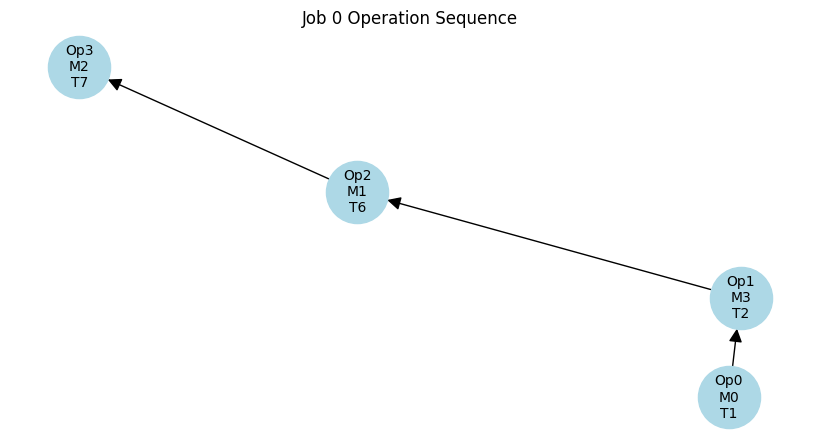

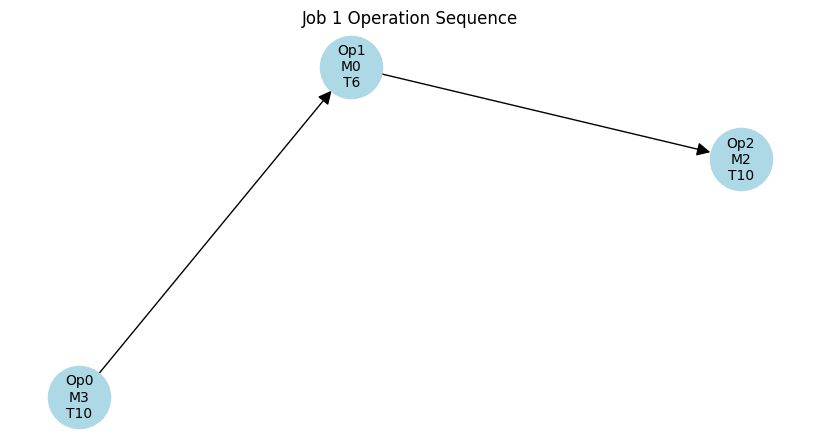

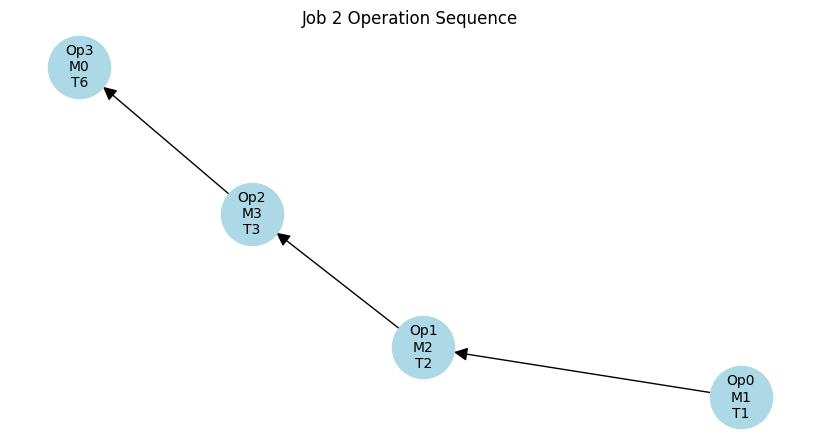

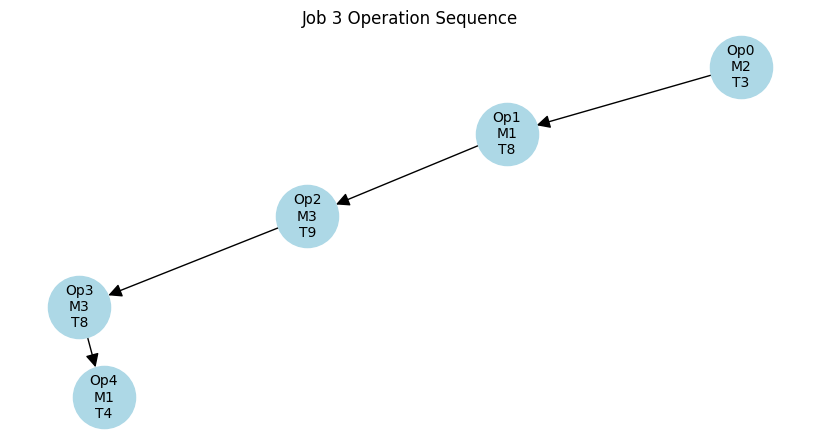

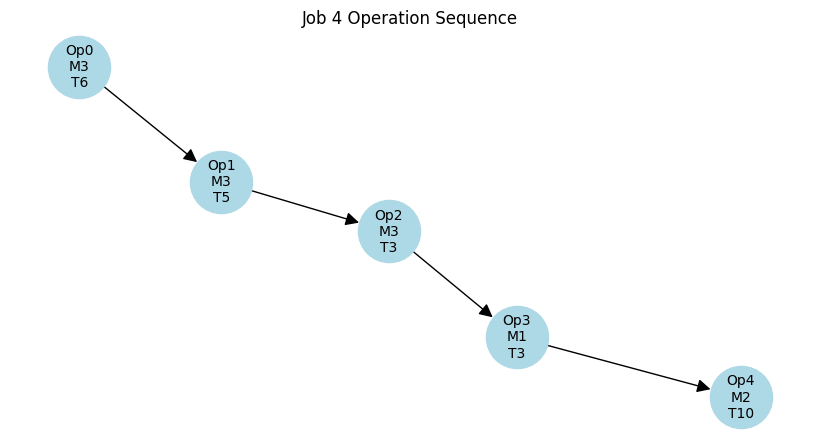

In [9]:
# Visualize job operation sequences
visualize_job_sequences(dataset['jobs'])

In [10]:
def visualize_machine_assignments(jobs, num_machines):
    """
    Visualizes which operations are assigned to each machine.
    """
    machine_ops = {machine_id: [] for machine_id in range(num_machines)}
    for job in jobs:
        for operation in job.operations:
            machine_ops[operation.machine_id].append((job.job_id, operation.operation_id, operation.processing_time))

    fig, axes = plt.subplots(num_machines, 1, figsize=(10, 2 * num_machines))
    if num_machines == 1:
        axes = [axes]  # Ensure iterable axes

    for machine_id, ax in zip(machine_ops.keys(), axes):
        ops = machine_ops[machine_id]
        ax.set_title(f"Machine {machine_id}")
        ax.set_xlim(0, max([op[2] for op in ops]) + 1)
        y_ticks = []
        y_labels = []
        for idx, op in enumerate(ops):
            start_time = 0  # Since we haven't scheduled, we'll set all start times to zero
            ax.broken_barh([(start_time, op[2])], (idx * 5, 4), facecolors=('tab:blue'))
            ax.text(start_time + op[2]/2, idx * 5 + 2, f"J{op[0]}-Op{op[1]}", ha='center', va='center', color='white')
            y_ticks.append(idx * 5 + 2)
            y_labels.append(f"Job {op[0]}")
        ax.set_ylim(0, len(ops) * 5)
        ax.set_xlabel('Processing Time')
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
    plt.tight_layout()
    plt.show()

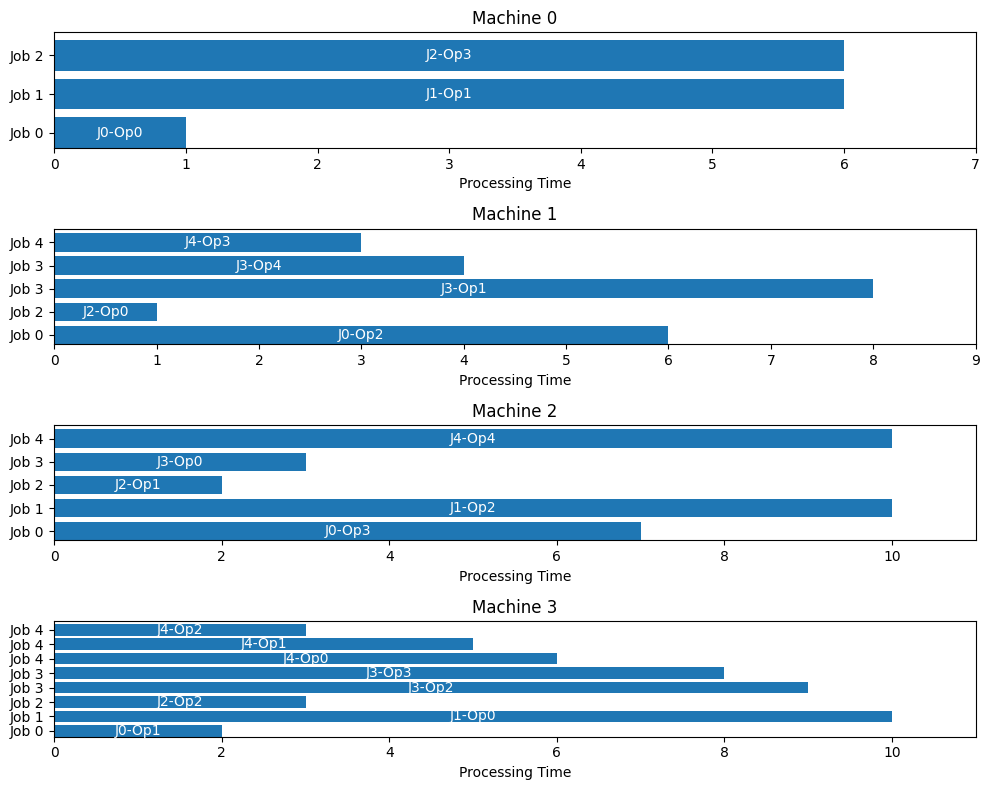

In [11]:
# Visualize machine assignments
visualize_machine_assignments(dataset['jobs'], NUM_MACHINES)

# Implement the Solution

## Genetic Algorithm

In [12]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

# Dataset Generation

def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Assign machines to operations
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_id in range(num_operations):
            machine_id = machine_sequence[op_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_id,
                machine_id=machine_id,
                processing_time=processing_time
            )
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [13]:
# Parameters for dataset generation
NUM_JOBS = 5           # Total number of jobs
NUM_MACHINES = 4       # Total number of machines
MIN_OPERATIONS = 3     # Minimum operations per job
MAX_OPERATIONS = 5     # Maximum operations per job
MIN_TIME = 1           # Minimum processing time
MAX_TIME = 10          # Maximum processing time

# Generate the dataset
dataset = generate_synthetic_jssp(
    num_jobs=NUM_JOBS,
    num_machines=NUM_MACHINES,
    min_operations=MIN_OPERATIONS,
    max_operations=MAX_OPERATIONS,
    min_time=MIN_TIME,
    max_time=MAX_TIME
)

In [14]:
def encode_chromosome(jobs: List[Job]) -> List[int]:
    """
    Encodes the jobs into a chromosome as a list of job IDs.
    """
    chromosome = []
    for job in jobs:
        chromosome.extend([job.job_id] * len(job.operations))
    random.shuffle(chromosome)
    return chromosome

def decode_chromosome(chromosome: List[int], jobs_dict: Dict[int, Job]) -> List[Operation]:
    """
    Decodes the chromosome into a sequence of operations.
    """
    job_counters = defaultdict(int)
    operation_sequence = []

    for job_id in chromosome:
        job = jobs_dict[job_id]
        op_idx = job_counters[job_id]
        if op_idx < len(job.operations):
            operation = job.operations[op_idx]
            operation_sequence.append(operation)
            job_counters[job_id] += 1
    return operation_sequence

def calculate_makespan(chromosome: List[int], jobs_dict: Dict[int, Job], num_machines: int) -> (int, Dict):
    operation_sequence = decode_chromosome(chromosome, jobs_dict)

    machine_available_time = [0] * num_machines
    job_last_finish_time = defaultdict(int)
    schedule = defaultdict(list)

    for op in operation_sequence:
        job_id = op.job_id
        machine_id = op.machine_id

        start_time = max(machine_available_time[machine_id], job_last_finish_time[job_id])
        finish_time = start_time + op.processing_time

        machine_available_time[machine_id] = finish_time
        job_last_finish_time[job_id] = finish_time

        schedule[machine_id].append({
            'job_id': job_id,
            'operation_id': op.operation_id,
            'start_time': start_time,
            'finish_time': finish_time,
            'processing_time': op.processing_time
        })

    makespan = max(machine_available_time)
    return makespan, schedule

def tournament_selection(population: List[List[int]], k: int, jobs_dict: Dict[int, Job], num_machines: int):
    selected = random.sample(population, k)
    selected = sorted(selected, key=lambda chromo: calculate_makespan(chromo, jobs_dict, num_machines)[0])
    return selected[0]

def crossover(parent1: List[int], parent2: List[int]) -> List[int]:
    """
    Performs a uniform crossover between two parents to produce an offspring.
    Suitable for chromosomes with duplicate genes.
    """
    size = len(parent1)
    offspring = []
    for i in range(size):
        if random.random() < 0.5:
            offspring.append(parent1[i])
        else:
            offspring.append(parent2[i])
    return offspring

def mutate(chromosome: List[int], mutation_rate: float) -> List[int]:
    size = len(chromosome)
    for _ in range(size):
        if random.random() < mutation_rate:
            idx1 = random.randint(0, size - 1)
            idx2 = random.randint(0, size - 1)
            chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome

def initialize_population(jobs: List[Job], population_size: int) -> List[List[int]]:
    population = []
    for _ in range(population_size):
        chromosome = encode_chromosome(jobs)
        population.append(chromosome)
    return population

In [15]:
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.1
ELITE_SIZE = 5

In [16]:
def genetic_algorithm(jobs: List[Job], num_machines: int):
    jobs_dict = {job.job_id: job for job in jobs}
    population = initialize_population(jobs, POPULATION_SIZE)
    best_makespan = float('inf')
    best_schedule = None
    best_chromosome = None

    for generation in range(NUM_GENERATIONS):
        new_population = []

        population = sorted(population, key=lambda chromo: calculate_makespan(chromo, jobs_dict, num_machines)[0])

        elites = population[:ELITE_SIZE]
        new_population.extend(elites)

        while len(new_population) < POPULATION_SIZE:
            parent1 = tournament_selection(population, TOURNAMENT_SIZE, jobs_dict, num_machines)
            parent2 = tournament_selection(population, TOURNAMENT_SIZE, jobs_dict, num_machines)
            offspring = crossover(parent1, parent2)
            offspring = mutate(offspring, MUTATION_RATE)
            new_population.append(offspring)

        population = new_population

        current_best_chromosome = population[0]
        current_makespan, current_schedule = calculate_makespan(current_best_chromosome, jobs_dict, num_machines)

        # Print the best makespan in every generation
        print(f"Generation {generation + 1}: Best Makespan = {current_makespan}")

        if current_makespan < best_makespan:
            best_makespan = current_makespan
            best_schedule = current_schedule
            best_chromosome = current_best_chromosome

    return best_makespan, best_schedule, best_chromosome

In [17]:
def plot_gantt_chart(schedule: Dict, num_machines: int):
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = plt.cm.tab20.colors
    for machine_id in range(num_machines):
        if machine_id in schedule:
            for op in schedule[machine_id]:
                start_time = op['start_time']
                finish_time = op['finish_time']
                duration = op['processing_time']
                job_id = op['job_id']
                operation_id = op['operation_id']
                color = colors[job_id % len(colors)]
                ax.broken_barh(
                    [(start_time, duration)],
                    (machine_id * 10, 9),
                    facecolors=(color)
                )
                ax.text(
                    start_time + duration / 2,
                    machine_id * 10 + 4.5,
                    f"J{job_id}-Op{operation_id}",
                    ha='center',
                    va='center',
                    color='black'
                )

    ax.set_ylim(0, num_machines * 10)
    ax.set_xlim(0, max([op['finish_time'] for ops in schedule.values() for op in ops]) + 10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.set_yticks([i * 10 + 4.5 for i in range(num_machines)])
    ax.set_yticklabels([f"M{i}" for i in range(num_machines)])
    ax.grid(True)
    plt.title('Job Shop Scheduling - Gantt Chart')
    plt.show()

Generation 1: Best Makespan = 46
Generation 2: Best Makespan = 32
Generation 3: Best Makespan = 32
Generation 4: Best Makespan = 29
Generation 5: Best Makespan = 29
Generation 6: Best Makespan = 26
Generation 7: Best Makespan = 26
Generation 8: Best Makespan = 25
Generation 9: Best Makespan = 23
Generation 10: Best Makespan = 23
Generation 11: Best Makespan = 23
Generation 12: Best Makespan = 23
Generation 13: Best Makespan = 23
Generation 14: Best Makespan = 23
Generation 15: Best Makespan = 23
Generation 16: Best Makespan = 23
Generation 17: Best Makespan = 23
Generation 18: Best Makespan = 23
Generation 19: Best Makespan = 23
Generation 20: Best Makespan = 23
Generation 21: Best Makespan = 23
Generation 22: Best Makespan = 23
Generation 23: Best Makespan = 23
Generation 24: Best Makespan = 23
Generation 25: Best Makespan = 23
Generation 26: Best Makespan = 23
Generation 27: Best Makespan = 23
Generation 28: Best Makespan = 23
Generation 29: Best Makespan = 23
Generation 30: Best Mak

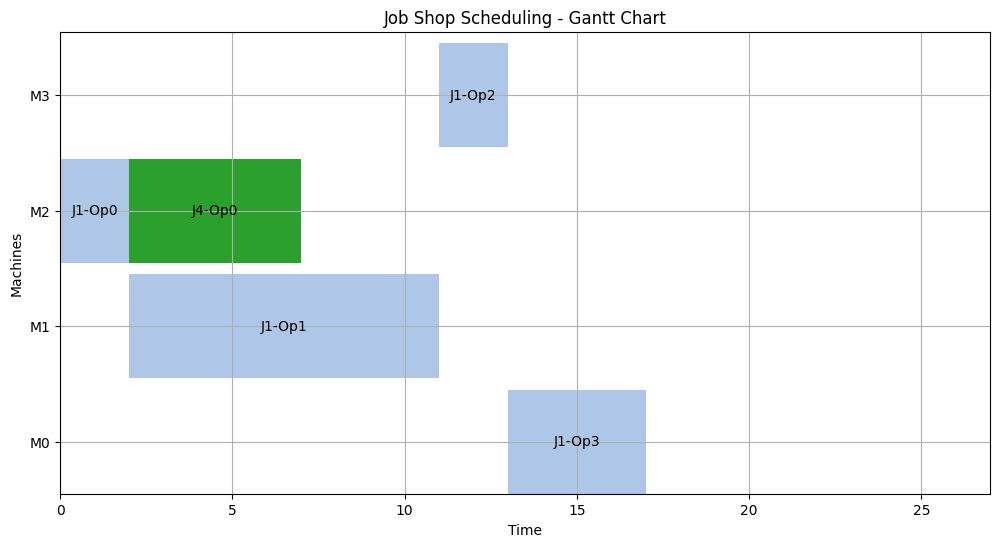

In [18]:
# Run Genetic Algorithm
best_makespan_ga, best_schedule_ga, best_chromosome_ga = genetic_algorithm(dataset['jobs'], NUM_MACHINES)

print(f"Best Makespan Achieved: {best_makespan_ga}")

# Plot Gantt Chart
plot_gantt_chart(best_schedule_ga, NUM_MACHINES)

## Differential Evolution

In [19]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int, op_id: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time
        self.op_id = op_id  # Unique identifier for the operation

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op_seq={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []
    op_counter = 0  # Counter for unique operation IDs

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Assign machines to operations
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_seq_id in range(num_operations):
            machine_id = machine_sequence[op_seq_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_seq_id,
                machine_id=machine_id,
                processing_time=processing_time,
                op_id=op_counter
            )
            op_counter += 1
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [20]:
# Parameters for dataset generation
NUM_JOBS = 5           # Total number of jobs
NUM_MACHINES = 4       # Total number of machines
MIN_OPERATIONS = 3     # Minimum operations per job
MAX_OPERATIONS = 5     # Maximum operations per job
MIN_TIME = 1           # Minimum processing time
MAX_TIME = 10          # Maximum processing time

# Generate the dataset
dataset = generate_synthetic_jssp(
    num_jobs=NUM_JOBS,
    num_machines=NUM_MACHINES,
    min_operations=MIN_OPERATIONS,
    max_operations=MAX_OPERATIONS,
    min_time=MIN_TIME,
    max_time=MAX_TIME
)

operations_list = dataset['operations']

In [21]:
def encode_individual(num_operations: int) -> np.ndarray:
    """
    Encodes an individual as a vector of random keys.
    """
    return np.random.rand(num_operations)

def decode_individual(
    individual: np.ndarray,
    operations_list: List[Operation],
    num_jobs: int
) -> List[Operation]:
    """
    Decodes the individual into a sequence of operations.
    """
    # Create a mapping from op_id to operation
    op_id_to_op = {op.op_id: op for op in operations_list}

    # Pair each operation with its random key
    op_key_pairs = list(zip(individual, operations_list))

    # Sort operations based on their keys
    op_key_pairs.sort(key=lambda x: x[0])

    # Initialize job operation counters
    job_op_counters = defaultdict(int)
    decoded_sequence = []

    for _, operation in op_key_pairs:
        job_id = operation.job_id
        op_seq = operation.operation_id

        # Check if the operation is the next one to be scheduled for its job
        if job_op_counters[job_id] == op_seq:
            decoded_sequence.append(operation)
            job_op_counters[job_id] += 1

    return decoded_sequence

def calculate_makespan(
    decoded_sequence: List[Operation],
    num_machines: int
) -> (int, Dict):
    """
    Calculates the makespan of the schedule represented by the decoded sequence.

    Returns:
    - makespan: Total completion time.
    - schedule: Dictionary containing the start and end times of each operation on each machine.
    """
    machine_available_time = [0] * num_machines
    job_last_finish_time = defaultdict(int)
    schedule = defaultdict(list)

    for op in decoded_sequence:
        job_id = op.job_id
        machine_id = op.machine_id

        start_time = max(machine_available_time[machine_id], job_last_finish_time[job_id])
        finish_time = start_time + op.processing_time

        machine_available_time[machine_id] = finish_time
        job_last_finish_time[job_id] = finish_time

        schedule[machine_id].append({
            'job_id': job_id,
            'operation_id': op.operation_id,
            'start_time': start_time,
            'finish_time': finish_time,
            'processing_time': op.processing_time
        })

    makespan = max(machine_available_time)
    return makespan, schedule

In [22]:
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
CR = 0.9           # Crossover probability
F = 0.8            # Differential weight

In [23]:
def initialize_population(pop_size: int, num_operations: int) -> List[np.ndarray]:
    """
    Initializes the population with random individuals.
    """
    population = [encode_individual(num_operations) for _ in range(pop_size)]
    return population

def mutation(population: List[np.ndarray], target_idx: int, F: float) -> np.ndarray:
    """
    Performs mutation to create a donor vector.

    Parameters:
    - population: Current population of individuals.
    - target_idx: Index of the target individual in the population.
    - F: Differential weight.

    Returns:
    - donor_vector: The mutated vector.
    """
    pop_size = len(population)
    indices = list(range(pop_size))
    indices.remove(target_idx)
    idxs = random.sample(indices, 3)
    a = population[idxs[0]]
    b = population[idxs[1]]
    c = population[idxs[2]]
    donor_vector = a + F * (b - c)
    # Ensure the donor vector elements are within [0, 1]
    donor_vector = np.clip(donor_vector, 0, 1)
    return donor_vector

def crossover(target: np.ndarray, donor: np.ndarray, CR: float) -> np.ndarray:
    """
    Performs crossover between target and donor vectors to produce a trial vector.

    Parameters:
    - target: The target vector (parent).
    - donor: The donor vector (mutated vector).
    - CR: Crossover probability.

    Returns:
    - trial_vector: The trial vector after crossover.
    """
    size = len(target)
    trial_vector = np.copy(target)
    j_rand = random.randint(0, size - 1)

    for j in range(size):
        if random.random() < CR or j == j_rand:
            trial_vector[j] = donor[j]

    return trial_vector

def selection(
    target: np.ndarray,
    trial: np.ndarray,
    operations_list: List[Operation],
    num_jobs: int,
    num_machines: int
) -> np.ndarray:
    """
    Selects between the target and trial vectors based on fitness.

    Returns:
    - The vector with the better fitness (lower makespan).
    """
    # Decode both target and trial vectors
    decoded_target = decode_individual(target, operations_list, num_jobs)
    target_makespan, _ = calculate_makespan(decoded_target, num_machines)

    decoded_trial = decode_individual(trial, operations_list, num_jobs)
    trial_makespan, _ = calculate_makespan(decoded_trial, num_machines)

    if trial_makespan < target_makespan:
        return trial
    else:
        return target

def differential_evolution(
    operations_list: List[Operation],
    num_jobs: int,
    num_machines: int
):
    num_operations = len(operations_list)
    population = initialize_population(POPULATION_SIZE, num_operations)
    best_individual = None
    best_makespan = float('inf')
    best_schedule = None

    for generation in range(NUM_GENERATIONS):
        new_population = []

        for i in range(POPULATION_SIZE):
            target = population[i]
            donor = mutation(population, i, F)
            trial = crossover(target, donor, CR)
            selected = selection(target, trial, operations_list, num_jobs, num_machines)
            new_population.append(selected)

        population = new_population

        # Find the best individual in the current population
        current_best_makespan = float('inf')
        current_best_individual = None
        current_best_schedule = None

        for individual in population:
            decoded_individual = decode_individual(individual, operations_list, num_jobs)
            makespan, schedule = calculate_makespan(decoded_individual, num_machines)
            if makespan < current_best_makespan:
                current_best_makespan = makespan
                current_best_individual = individual
                current_best_schedule = schedule

        # Update the global best if current best is better
        if current_best_makespan < best_makespan:
            best_makespan = current_best_makespan
            best_individual = current_best_individual
            best_schedule = current_best_schedule

        # Print the best makespan for this generation
        print(f"Generation {generation + 1}: Best Makespan = {current_best_makespan}")

    # Decode the best individual to get the operation sequence
    best_decoded_sequence = decode_individual(best_individual, operations_list, num_jobs)
    return best_makespan, best_schedule, best_decoded_sequence

In [24]:
def plot_gantt_chart(schedule: Dict, num_machines: int):
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = plt.cm.tab20.colors
    for machine_id in range(num_machines):
        if machine_id in schedule:
            for op in schedule[machine_id]:
                start_time = op['start_time']
                duration = op['processing_time']
                job_id = op['job_id']
                operation_id = op['operation_id']
                color = colors[job_id % len(colors)]
                ax.broken_barh(
                    [(start_time, duration)],
                    (machine_id * 10, 9),
                    facecolors=(color)
                )
                ax.text(
                    start_time + duration / 2,
                    machine_id * 10 + 4.5,
                    f"J{job_id}-Op{operation_id}",
                    ha='center',
                    va='center',
                    color='black'
                )

    ax.set_ylim(0, num_machines * 10)
    ax.set_xlim(0, max([op['finish_time'] for ops in schedule.values() for op in ops]) + 10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.set_yticks([i * 10 + 4.5 for i in range(num_machines)])
    ax.set_yticklabels([f"M{i}" for i in range(num_machines)])
    ax.grid(True)
    plt.title('Job Shop Scheduling - Gantt Chart (Differential Evolution)')
    plt.show()

Generation 1: Best Makespan = 12
Generation 2: Best Makespan = 12
Generation 3: Best Makespan = 12
Generation 4: Best Makespan = 12
Generation 5: Best Makespan = 12
Generation 6: Best Makespan = 12
Generation 7: Best Makespan = 12
Generation 8: Best Makespan = 12
Generation 9: Best Makespan = 12
Generation 10: Best Makespan = 12
Generation 11: Best Makespan = 12
Generation 12: Best Makespan = 12
Generation 13: Best Makespan = 12
Generation 14: Best Makespan = 12
Generation 15: Best Makespan = 12
Generation 16: Best Makespan = 12
Generation 17: Best Makespan = 12
Generation 18: Best Makespan = 12
Generation 19: Best Makespan = 12
Generation 20: Best Makespan = 12
Generation 21: Best Makespan = 12
Generation 22: Best Makespan = 12
Generation 23: Best Makespan = 12
Generation 24: Best Makespan = 12
Generation 25: Best Makespan = 12
Generation 26: Best Makespan = 12
Generation 27: Best Makespan = 12
Generation 28: Best Makespan = 12
Generation 29: Best Makespan = 12
Generation 30: Best Mak

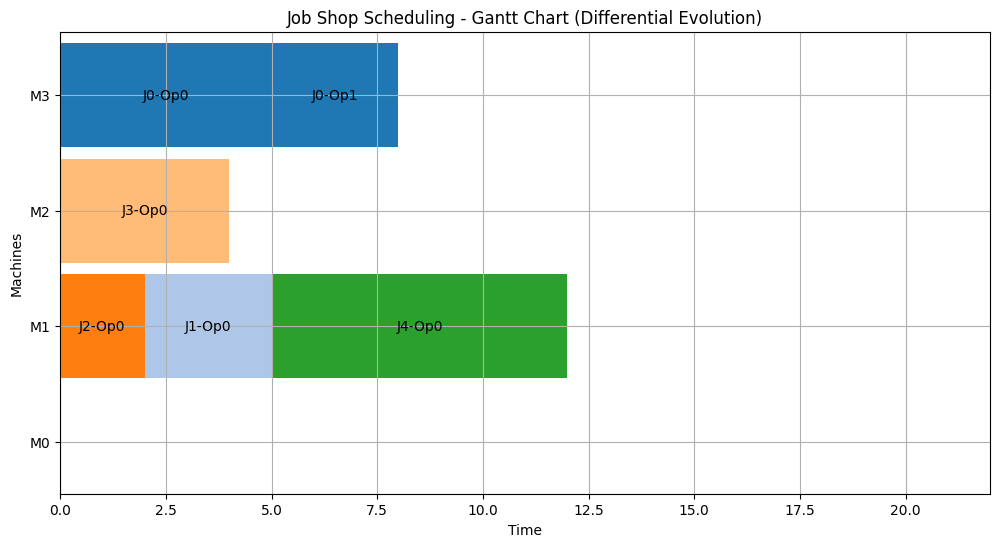

In [25]:
# Run Differential Evolution
best_makespan_de, best_schedule_de, best_sequence_de = differential_evolution(
    operations_list,
    NUM_JOBS,
    NUM_MACHINES
)

print(f"Best Makespan Achieved: {best_makespan_de}")

# Plot Gantt Chart
plot_gantt_chart(best_schedule_de, NUM_MACHINES)

## Simulated Annealing

In [26]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int, op_id: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time
        self.op_id = op_id  # Unique identifier for the operation

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op_seq={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []
    op_counter = 0  # Counter for unique operation IDs

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Assign machines to operations
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_seq_id in range(num_operations):
            machine_id = machine_sequence[op_seq_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_seq_id,
                machine_id=machine_id,
                processing_time=processing_time,
                op_id=op_counter
            )
            op_counter += 1
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [27]:
# Parameters for dataset generation
NUM_JOBS = 5           # Total number of jobs
NUM_MACHINES = 4       # Total number of machines
MIN_OPERATIONS = 3     # Minimum operations per job
MAX_OPERATIONS = 5     # Maximum operations per job
MIN_TIME = 1           # Minimum processing time
MAX_TIME = 10          # Maximum processing time

# Generate the dataset
dataset = generate_synthetic_jssp(
    num_jobs=NUM_JOBS,
    num_machines=NUM_MACHINES,
    min_operations=MIN_OPERATIONS,
    max_operations=MAX_OPERATIONS,
    min_time=MIN_TIME,
    max_time=MAX_TIME
)

jobs = dataset['jobs']

In [28]:
def create_initial_solution(jobs: List[Job]) -> List[Operation]:
    """
    Creates an initial feasible solution using the job-based representation.
    """
    # Initialize job operation counters
    job_op_counters = {job.job_id: 0 for job in jobs}
    total_operations = sum(len(job.operations) for job in jobs)
    solution = []

    while len(solution) < total_operations:
        for job in jobs:
            op_idx = job_op_counters[job.job_id]
            if op_idx < len(job.operations):
                operation = job.operations[op_idx]
                solution.append(operation)
                job_op_counters[job.job_id] += 1

    return solution

def calculate_makespan(
    operation_sequence: List[Operation],
    num_machines: int
) -> (int, Dict):
    machine_available_time = [0] * num_machines
    job_last_finish_time = defaultdict(int)
    schedule = defaultdict(list)

    for op in operation_sequence:
        job_id = op.job_id
        machine_id = op.machine_id

        start_time = max(machine_available_time[machine_id], job_last_finish_time[job_id])
        finish_time = start_time + op.processing_time

        machine_available_time[machine_id] = finish_time
        job_last_finish_time[job_id] = finish_time

        schedule[machine_id].append({
            'job_id': job_id,
            'operation_id': op.operation_id,
            'start_time': start_time,
            'finish_time': finish_time,
            'processing_time': op.processing_time
        })

    makespan = max(machine_available_time)
    return makespan, schedule

def generate_neighbor(solution: List[Operation], jobs: List[Job]) -> List[Operation]:
    """
    Generates a neighboring solution by swapping two adjacent operations if feasible.
    """
    neighbor = solution.copy()
    idx1 = random.randint(0, len(neighbor) - 2)
    idx2 = idx1 + 1

    op1 = neighbor[idx1]
    op2 = neighbor[idx2]

    # Check if swapping op1 and op2 violates precedence constraints
    if op1.job_id == op2.job_id:
        # Swapping operations of the same job; ensure we don't violate the sequence
        if op1.operation_id > op2.operation_id:
            neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]
    else:
        # Swapping operations of different jobs; safe to swap
        neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]

    return neighbor

def exponential_cooling(T_initial: float, alpha: float, iteration: int) -> float:
    """
    Exponential cooling schedule.
    """
    return T_initial * (alpha ** iteration)

def acceptance_probability(delta: float, temperature: float) -> float:
    """
    Calculates the acceptance probability of a worse solution.
    """
    return math.exp(-delta / temperature)

In [29]:
T_INITIAL = 1000      # Initial temperature
T_MIN = 1             # Minimum temperature
ALPHA = 0.95          # Cooling rate
MAX_ITERATIONS = 1000 # Maximum iterations at each temperature

In [30]:
def simulated_annealing(
    jobs: List[Job],
    num_machines: int,
    T_initial: float = 1000.0,
    T_min: float = 1.0,
    alpha: float = 0.95,
    max_iterations: int = 1000
):
    """
    Performs the Simulated Annealing algorithm to find a near-optimal schedule.

    Parameters:
    - jobs: List of Job instances.
    - num_machines: Total number of machines.
    - T_initial: Initial temperature.
    - T_min: Minimum temperature to stop the algorithm.
    - alpha: Cooling rate (0 < alpha < 1).
    - max_iterations: Maximum iterations at each temperature level.

    Returns:
    - best_makespan: The best makespan found.
    - best_schedule: The schedule corresponding to the best makespan.
    - best_solution: The operation sequence of the best schedule.
    """
    # Create initial solution
    current_solution = create_initial_solution(jobs)
    current_makespan, _ = calculate_makespan(current_solution, num_machines)
    best_solution = current_solution.copy()
    best_makespan = current_makespan

    T = T_initial
    iteration = 0

    while T > T_min:
        for _ in range(max_iterations):
            neighbor = generate_neighbor(current_solution, jobs)
            neighbor_makespan, _ = calculate_makespan(neighbor, num_machines)
            delta = neighbor_makespan - current_makespan

            if delta < 0:
                # Accept better solution
                current_solution = neighbor
                current_makespan = neighbor_makespan

                if current_makespan < best_makespan:
                    best_solution = current_solution.copy()
                    best_makespan = current_makespan
                    print(f"Temperature {T:.2f}: New Best Makespan = {best_makespan}")
            else:
                # Accept worse solution with a probability
                ap = acceptance_probability(delta, T)
                if random.random() < ap:
                    current_solution = neighbor
                    current_makespan = neighbor_makespan

        # Print the current makespan at this temperature
        print(f"Temperature {T:.2f}: Current Makespan = {current_makespan}")

        # Cool down the temperature
        T *= alpha
        iteration += 1

    # Calculate the schedule for the best solution
    best_makespan, best_schedule = calculate_makespan(best_solution, num_machines)
    return best_makespan, best_schedule, best_solution

In [31]:
def plot_gantt_chart(schedule: Dict, num_machines: int):
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = plt.cm.tab20.colors
    for machine_id in range(num_machines):
        if machine_id in schedule:
            for op in schedule[machine_id]:
                start_time = op['start_time']
                duration = op['processing_time']
                job_id = op['job_id']
                operation_id = op['operation_id']
                color = colors[job_id % len(colors)]
                ax.broken_barh(
                    [(start_time, duration)],
                    (machine_id * 10, 9),
                    facecolors=(color)
                )
                ax.text(
                    start_time + duration / 2,
                    machine_id * 10 + 4.5,
                    f"J{job_id}-Op{operation_id}",
                    ha='center',
                    va='center',
                    color='black'
                )

    ax.set_ylim(0, num_machines * 10)
    ax.set_xlim(0, max([op['finish_time'] for ops in schedule.values() for op in ops]) + 10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.set_yticks([i * 10 + 4.5 for i in range(num_machines)])
    ax.set_yticklabels([f"M{i}" for i in range(num_machines)])
    ax.grid(True)
    plt.title('Job Shop Scheduling - Gantt Chart (Simulated Annealing)')
    plt.show()

Temperature 1000.00: New Best Makespan = 46
Temperature 1000.00: New Best Makespan = 45
Temperature 1000.00: Current Makespan = 63
Temperature 950.00: Current Makespan = 77
Temperature 902.50: Current Makespan = 67
Temperature 857.38: Current Makespan = 65
Temperature 814.51: Current Makespan = 67
Temperature 773.78: Current Makespan = 59
Temperature 735.09: Current Makespan = 59
Temperature 698.34: Current Makespan = 61
Temperature 663.42: Current Makespan = 52
Temperature 630.25: Current Makespan = 52
Temperature 598.74: Current Makespan = 63
Temperature 568.80: Current Makespan = 59
Temperature 540.36: Current Makespan = 57
Temperature 513.34: Current Makespan = 70
Temperature 487.67: Current Makespan = 62
Temperature 463.29: Current Makespan = 54
Temperature 440.13: Current Makespan = 79
Temperature 418.12: Current Makespan = 58
Temperature 397.21: Current Makespan = 57
Temperature 377.35: Current Makespan = 60
Temperature 358.49: Current Makespan = 61
Temperature 340.56: Current M

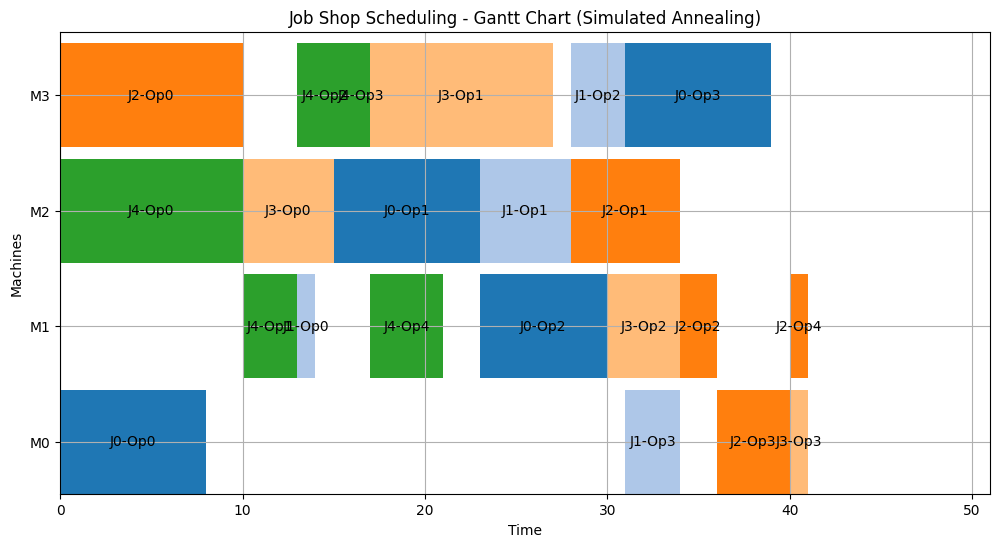

In [32]:
# Run Simulated Annealing
best_makespan_sa, best_schedule_sa, best_solution_sa = simulated_annealing(
    jobs,
    NUM_MACHINES,
    T_initial=T_INITIAL,
    T_min=T_MIN,
    alpha=ALPHA,
    max_iterations=MAX_ITERATIONS
)

print(f"\nBest Makespan Achieved: {best_makespan_sa}")

# Plot Gantt Chart
plot_gantt_chart(best_schedule_sa, NUM_MACHINES)

## Particle Swarm

In [33]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int, op_id: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time
        self.op_id = op_id  # Unique identifier for the operation

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op_seq={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []
    op_counter = 0  # Counter for unique operation IDs

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Assign machines to operations
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_seq_id in range(num_operations):
            machine_id = machine_sequence[op_seq_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_seq_id,
                machine_id=machine_id,
                processing_time=processing_time,
                op_id=op_counter
            )
            op_counter += 1
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [34]:
# Parameters for dataset generation
NUM_JOBS = 5           # Total number of jobs
NUM_MACHINES = 4       # Total number of machines
MIN_OPERATIONS = 3     # Minimum operations per job
MAX_OPERATIONS = 5     # Maximum operations per job
MIN_TIME = 1           # Minimum processing time
MAX_TIME = 10          # Maximum processing time

# Generate the dataset
dataset = generate_synthetic_jssp(
    num_jobs=NUM_JOBS,
    num_machines=NUM_MACHINES,
    min_operations=MIN_OPERATIONS,
    max_operations=MAX_OPERATIONS,
    min_time=MIN_TIME,
    max_time=MAX_TIME
)

operations_list = dataset['operations']

In [35]:
def initialize_particle(num_operations: int) -> np.ndarray:
    """
    Initializes a particle's position and velocity.
    """
    position = np.random.rand(num_operations)
    velocity = np.zeros(num_operations)
    return position, velocity

def decode_particle(
    position: np.ndarray,
    operations_list: List[Operation],
    num_jobs: int
) -> List[Operation]:
    """
    Decodes the particle's position into a sequence of operations.
    """
    op_key_pairs = list(zip(position, operations_list))
    op_key_pairs.sort(key=lambda x: x[0])
    job_op_counters = defaultdict(int)
    decoded_sequence = []

    for _, operation in op_key_pairs:
        job_id = operation.job_id
        op_seq = operation.operation_id

        if job_op_counters[job_id] == op_seq:
            decoded_sequence.append(operation)
            job_op_counters[job_id] += 1

    return decoded_sequence

def calculate_makespan(
    decoded_sequence: List[Operation],
    num_machines: int
) -> (int, Dict):
    """
    Calculates the makespan of the schedule represented by the decoded sequence.

    Returns:
    - makespan: Total completion time.
    - schedule: Dictionary containing the start and end times of each operation on each machine.
    """
    machine_available_time = [0] * num_machines
    job_last_finish_time = defaultdict(int)
    schedule = defaultdict(list)

    for op in decoded_sequence:
        job_id = op.job_id
        machine_id = op.machine_id

        start_time = max(machine_available_time[machine_id], job_last_finish_time[job_id])
        finish_time = start_time + op.processing_time

        machine_available_time[machine_id] = finish_time
        job_last_finish_time[job_id] = finish_time

        schedule[machine_id].append({
            'job_id': job_id,
            'operation_id': op.operation_id,
            'start_time': start_time,
            'finish_time': finish_time,
            'processing_time': op.processing_time
        })

    makespan = max(machine_available_time)
    return makespan, schedule

In [36]:
POPULATION_SIZE = 30
NUM_ITERATIONS = 100
W = 0.5           # Inertia weight
C1 = 1.5          # Cognitive (particle) weight
C2 = 1.5          # Social (swarm) weight

In [37]:
def initialize_population(pop_size: int, num_operations: int) -> List[Dict]:
    """
    Initializes the population of particles.
    Each particle has position, velocity, personal best position, and personal best makespan.
    """
    population = []
    for _ in range(pop_size):
        position, velocity = initialize_particle(num_operations)
        particle = {
            'position': position,
            'velocity': velocity,
            'personal_best_position': position.copy(),
            'personal_best_makespan': float('inf'),
            'personal_best_schedule': None
        }
        population.append(particle)
    return population

def update_velocity_and_position(
    particle: Dict,
    global_best_position: np.ndarray,
    W: float,
    C1: float,
    C2: float
):
    """
    Updates the velocity and position of a particle.
    """
    r1 = np.random.rand(len(particle['position']))
    r2 = np.random.rand(len(particle['position']))

    cognitive_component = C1 * r1 * (particle['personal_best_position'] - particle['position'])
    social_component = C2 * r2 * (global_best_position - particle['position'])
    new_velocity = W * particle['velocity'] + cognitive_component + social_component

    # Update position
    particle['velocity'] = new_velocity
    particle['position'] += new_velocity

    # Ensure the position values are within [0, 1]
    particle['position'] = np.mod(particle['position'], 1)

def particle_swarm_optimization(
    operations_list: List[Operation],
    num_jobs: int,
    num_machines: int
):
    num_operations = len(operations_list)
    population = initialize_population(POPULATION_SIZE, num_operations)

    global_best_position = None
    global_best_makespan = float('inf')
    global_best_schedule = None

    for iteration in range(NUM_ITERATIONS):
        # Initialize variables to compute the average makespan
        total_makespan = 0

        for particle in population:
            # Decode the particle's position to get the operation sequence
            decoded_sequence = decode_particle(particle['position'], operations_list, num_jobs)
            makespan, schedule = calculate_makespan(decoded_sequence, num_machines)

            # Update personal best
            if makespan < particle['personal_best_makespan']:
                particle['personal_best_makespan'] = makespan
                particle['personal_best_position'] = particle['position'].copy()
                particle['personal_best_schedule'] = schedule

            # Update global best
            if makespan < global_best_makespan:
                global_best_makespan = makespan
                global_best_position = particle['position'].copy()
                global_best_schedule = schedule

            total_makespan += makespan

        # Compute average makespan of the swarm
        average_makespan = total_makespan / POPULATION_SIZE

        # Print progress at each iteration
        print(f"Iteration {iteration + 1}: Global Best Makespan = {global_best_makespan}, Average Makespan = {average_makespan}")

        # Update velocities and positions
        for particle in population:
            update_velocity_and_position(particle, global_best_position, W, C1, C2)

    # Decode the global best position to get the operation sequence
    best_decoded_sequence = decode_particle(global_best_position, operations_list, num_jobs)
    return global_best_makespan, global_best_schedule, best_decoded_sequence

In [38]:
def plot_gantt_chart(schedule: Dict, num_machines: int):
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = plt.cm.tab20.colors
    for machine_id in range(num_machines):
        if machine_id in schedule:
            for op in schedule[machine_id]:
                start_time = op['start_time']
                duration = op['processing_time']
                job_id = op['job_id']
                operation_id = op['operation_id']
                color = colors[job_id % len(colors)]
                ax.broken_barh(
                    [(start_time, duration)],
                    (machine_id * 10, 9),
                    facecolors=(color)
                )
                ax.text(
                    start_time + duration / 2,
                    machine_id * 10 + 4.5,
                    f"J{job_id}-Op{operation_id}",
                    ha='center',
                    va='center',
                    color='black'
                )

    ax.set_ylim(0, num_machines * 10)
    ax.set_xlim(0, max([op['finish_time'] for ops in schedule.values() for op in ops]) + 10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.set_yticks([i * 10 + 4.5 for i in range(num_machines)])
    ax.set_yticklabels([f"M{i}" for i in range(num_machines)])
    ax.grid(True)
    plt.title('Job Shop Scheduling - Gantt Chart (Particle Swarm Optimization)')
    plt.show()

Iteration 1: Global Best Makespan = 27, Average Makespan = 31.766666666666666
Iteration 2: Global Best Makespan = 27, Average Makespan = 31.966666666666665
Iteration 3: Global Best Makespan = 27, Average Makespan = 32.766666666666666
Iteration 4: Global Best Makespan = 27, Average Makespan = 33.766666666666666
Iteration 5: Global Best Makespan = 27, Average Makespan = 32.36666666666667
Iteration 6: Global Best Makespan = 27, Average Makespan = 31.7
Iteration 7: Global Best Makespan = 27, Average Makespan = 31.466666666666665
Iteration 8: Global Best Makespan = 27, Average Makespan = 31.166666666666668
Iteration 9: Global Best Makespan = 27, Average Makespan = 31.6
Iteration 10: Global Best Makespan = 27, Average Makespan = 28.6
Iteration 11: Global Best Makespan = 27, Average Makespan = 31.9
Iteration 12: Global Best Makespan = 27, Average Makespan = 31.666666666666668
Iteration 13: Global Best Makespan = 27, Average Makespan = 29.8
Iteration 14: Global Best Makespan = 27, Average Make

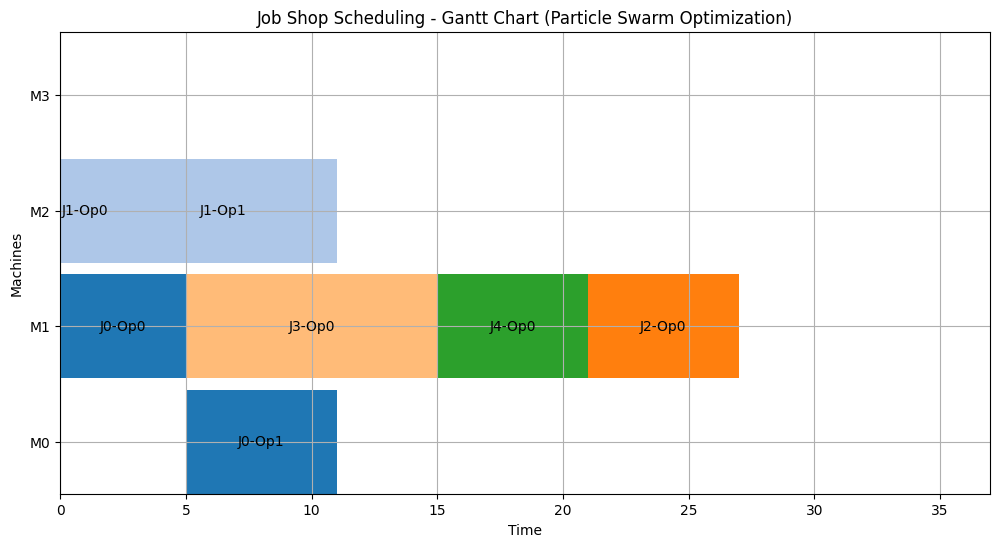

In [39]:
# Run Particle Swarm Optimization
best_makespan_pso, best_schedule_pso, best_sequence_pso = particle_swarm_optimization(
    operations_list,
    NUM_JOBS,
    NUM_MACHINES
)

print(f"\nBest Makespan Achieved: {best_makespan_pso}")

# Plot Gantt Chart
plot_gantt_chart(best_schedule_pso, NUM_MACHINES)

## GNN and RL

In [40]:
!pip install -q torch_geometric

In [41]:
import torch
TORCH = torch.__version__.split("+")[0]
CUDA = 'cu' + torch.version.cuda.replace('.', '') if torch.cuda.is_available() else 'cpu'
print(f"PyTorch version: {TORCH}")
print(f"CUDA version: {CUDA}")

PyTorch version: 2.4.0
CUDA version: cpu


In [42]:
!pip install -q pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html

In [43]:
import torch_geometric
torch_geometric.__version__

'2.6.0'

In [44]:
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing, GCNConv, global_mean_pool
from torch.distributions.categorical import Categorical

In [45]:
class Operation:
    def __init__(self, job_id: int, operation_id: int, machine_id: int, processing_time: int, op_id: int):
        self.job_id = job_id
        self.operation_id = operation_id  # Sequence order within the job
        self.machine_id = machine_id
        self.processing_time = processing_time
        self.op_id = op_id  # Unique identifier for the operation

    def __repr__(self):
        return (f"Operation(job={self.job_id}, op_seq={self.operation_id}, "
                f"machine={self.machine_id}, time={self.processing_time})")

class Job:
    def __init__(self, job_id: int, operations: List[Operation]):
        self.job_id = job_id
        self.operations = operations  # List of Operation instances

    def __repr__(self):
        return f"Job(id={self.job_id}, operations={self.operations})"

class Machine:
    def __init__(self, machine_id: int):
        self.machine_id = machine_id

    def __repr__(self):
        return f"Machine(id={self.machine_id})"

def generate_synthetic_jssp(
    num_jobs: int,
    num_machines: int,
    min_operations: int,
    max_operations: int,
    min_time: int,
    max_time: int
) -> Dict[str, List]:
    jobs = []
    machines = [Machine(machine_id=i) for i in range(num_machines)]
    all_operations = []
    op_counter = 0  # Counter for unique operation IDs

    for job_id in range(num_jobs):
        num_operations = random.randint(min_operations, max_operations)
        job_operations = []
        # Assign machines to operations
        if num_operations <= num_machines:
            machine_sequence = random.sample(range(num_machines), num_operations)
        else:
            machine_sequence = [random.randint(0, num_machines - 1) for _ in range(num_operations)]

        for op_seq_id in range(num_operations):
            machine_id = machine_sequence[op_seq_id]
            processing_time = random.randint(min_time, max_time)
            operation = Operation(
                job_id=job_id,
                operation_id=op_seq_id,
                machine_id=machine_id,
                processing_time=processing_time,
                op_id=op_counter
            )
            op_counter += 1
            job_operations.append(operation)
            all_operations.append(operation)

        job = Job(job_id=job_id, operations=job_operations)
        jobs.append(job)

    dataset = {
        'jobs': jobs,
        'machines': machines,
        'operations': all_operations
    }
    return dataset

In [46]:
# Problem parameters
NUM_JOBS = 5
NUM_MACHINES = 4
MIN_OPERATIONS = 3
MAX_OPERATIONS = 5
MIN_TIME = 1
MAX_TIME = 10

# Generate a JSSP instance
dataset = generate_synthetic_jssp(
    NUM_JOBS,
    NUM_MACHINES,
    MIN_OPERATIONS,
    MAX_OPERATIONS,
    MIN_TIME,
    MAX_TIME
)

In [47]:
class JSSPEnvironment:
    def __init__(self, dataset: Dict[str, List]):
        self.jobs = dataset['jobs']
        self.machines = dataset['machines']
        self.operations = dataset['operations']
        self.num_jobs = len(self.jobs)
        self.num_machines = len(self.machines)
        self.total_operations = len(self.operations)
        self.reset()

    def reset(self):
        self.machine_available_time = [0] * self.num_machines
        self.job_next_op = {job.job_id: 0 for job in self.jobs}
        self.operation_finished = {}
        self.time = 0
        self.done = False
        self.schedule = []

        # Build mappings between operation IDs and node indices
        self.op_id_to_idx = {}
        self.idx_to_op_id = {}
        idx = 0
        for job in self.jobs:
            for op in job.operations:
                self.op_id_to_idx[op.op_id] = idx
                self.idx_to_op_id[idx] = op.op_id
                idx += 1

        return self._get_state()

    def _get_state(self):
        node_features = []
        edge_index = [[], []]

        for job in self.jobs:
            for op in job.operations:
                idx = self.op_id_to_idx[op.op_id]
                is_available = int(self.job_next_op[op.job_id] == op.operation_id)
                node_features.append([
                    op.processing_time,
                    op.machine_id,
                    op.job_id,
                    is_available
                ])

                # Add edges between consecutive operations in the same job
                if op.operation_id < len(job.operations) - 1:
                    current_idx = idx
                    next_op = job.operations[op.operation_id + 1]
                    next_idx = self.op_id_to_idx[next_op.op_id]
                    edge_index[0].extend([current_idx, next_idx])
                    edge_index[1].extend([next_idx, current_idx])

        x = torch.tensor(node_features, dtype=torch.float)
        edge_index = torch.tensor(edge_index, dtype=torch.long)
        return Data(x=x, edge_index=edge_index)

    def _get_available_ops(self):
        available_ops = []
        for job in self.jobs:
            next_op_idx = self.job_next_op[job.job_id]
            if next_op_idx < len(job.operations):
                op = job.operations[next_op_idx]
                if op.op_id not in self.operation_finished:
                    available_ops.append(op)
        return available_ops

    def step(self, op):
        if self.done:
            raise Exception("Episode is done")

        available_ops = self._get_available_ops()
        if len(available_ops) == 0:
            self.done = True
            return self._get_state(), 0, self.done, {}

        if op not in available_ops:
            raise Exception("Selected operation is not available")

        start_time = max(
            self.machine_available_time[op.machine_id],
            self.time
        )
        finish_time = start_time + op.processing_time
        self.machine_available_time[op.machine_id] = finish_time
        self.job_next_op[op.job_id] += 1
        self.operation_finished[op.op_id] = True
        self.time = min(self.machine_available_time)

        self.schedule.append({
            'op': op,
            'start_time': start_time,
            'finish_time': finish_time
        })

        reward = -finish_time  # Negative makespan to maximize total reward
        self.done = len(self.operation_finished) == self.total_operations
        return self._get_state(), reward, self.done, {}

In [48]:
class GNNPolicy(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GNNPolicy, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        logits = self.fc(x).squeeze()
        return logits

class PPOAgent:
    def __init__(self, input_dim, hidden_dim, lr=1e-3, gamma=0.99, clip_epsilon=0.2):
        self.policy = GNNPolicy(input_dim, hidden_dim)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon

    def select_action(self, state, available_actions):
        logits = self.policy(state)
        mask = torch.zeros_like(logits)
        mask[available_actions] = 1
        logits = logits * mask - (1 - mask) * 1e10  # Mask unavailable actions
        probs = torch.softmax(logits, dim=0)
        m = Categorical(probs)
        action_idx = m.sample()
        return action_idx.item(), m.log_prob(action_idx), m.entropy()

    def update(self, trajectories):
        states = [t['state'] for t in trajectories]
        actions = torch.tensor([t['action'] for t in trajectories])
        rewards = [t['reward'] for t in trajectories]
        log_probs_old = torch.stack([t['log_prob'] for t in trajectories])
        returns = self.compute_returns(rewards)

        # Concatenate states for batch processing
        batch_states = Batch.from_data_list(states)
        logits = self.policy(batch_states)
        log_probs = torch.log_softmax(logits, dim=0)
        log_probs_actions = log_probs[actions]

        ratios = torch.exp(log_probs_actions - log_probs_old)
        advantages = returns - returns.mean()

        surr1 = ratios * advantages
        surr2 = torch.clamp(ratios, 1 - self.clip_epsilon, 1 + self.clip_epsilon) * advantages
        loss = -torch.min(surr1, surr2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def compute_returns(self, rewards):
        R = 0
        returns = []
        for r in reversed(rewards):
            R = r + self.gamma * R
            returns.insert(0, R)
        return torch.tensor(returns, dtype=torch.float)

In [49]:
def train_agent(agent, env, num_episodes):
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        trajectories = []
        total_reward = 0

        while not done:
            available_ops = env._get_available_ops()
            if len(available_ops) == 0:
                break
            available_indices = [env.op_id_to_idx[op.op_id] for op in available_ops]
            op_idx_to_op = {env.op_id_to_idx[op.op_id]: op for op in available_ops}
            action_idx, log_prob, entropy = agent.select_action(state, available_indices)
            op = op_idx_to_op[action_idx]
            next_state, reward, done, _ = env.step(op)
            trajectories.append({
                'state': state,
                'action': action_idx,
                'reward': reward,
                'log_prob': log_prob,
                'entropy': entropy
            })
            state = next_state
            total_reward += reward

        agent.update(trajectories)
        makespan = -total_reward
        print(f"Episode {episode+1}/{num_episodes}, Makespan: {makespan}")

In [50]:
def plot_gantt_chart(schedule, num_machines):
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = plt.cm.tab20.colors
    for machine_id in range(num_machines):
        machine_ops = [s for s in schedule if s['op'].machine_id == machine_id]
        for s in machine_ops:
            start_time = s['start_time']
            duration = s['op'].processing_time
            job_id = s['op'].job_id
            operation_id = s['op'].operation_id
            color = colors[job_id % len(colors)]
            ax.broken_barh(
                [(start_time, duration)],
                (machine_id * 10, 9),
                facecolors=(color)
            )
            ax.text(
                start_time + duration / 2,
                machine_id * 10 + 4.5,
                f"J{job_id}-Op{operation_id}",
                ha='center',
                va='center',
                color='black'
            )
    ax.set_ylim(0, num_machines * 10)
    ax.set_xlim(0, max([s['finish_time'] for s in schedule]) + 10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Machines')
    ax.set_yticks([i * 10 + 4.5 for i in range(num_machines)])
    ax.set_yticklabels([f"M{i}" for i in range(num_machines)])
    ax.grid(True)
    plt.title('Job Shop Scheduling - Gantt Chart')
    plt.show()

In [51]:
# Initialize the environment
env = JSSPEnvironment(dataset)

# Agent parameters
INPUT_DIM = 4  # processing_time, machine_id, job_id, is_available
HIDDEN_DIM = 64
agent = PPOAgent(INPUT_DIM, HIDDEN_DIM)

# Train the agent
NUM_EPISODES = 100
train_agent(agent, env, NUM_EPISODES)

Episode 1/100, Makespan: 265
Episode 2/100, Makespan: 269
Episode 3/100, Makespan: 260
Episode 4/100, Makespan: 242
Episode 5/100, Makespan: 263
Episode 6/100, Makespan: 282
Episode 7/100, Makespan: 263
Episode 8/100, Makespan: 285
Episode 9/100, Makespan: 249
Episode 10/100, Makespan: 274
Episode 11/100, Makespan: 286
Episode 12/100, Makespan: 293
Episode 13/100, Makespan: 269
Episode 14/100, Makespan: 257
Episode 15/100, Makespan: 262
Episode 16/100, Makespan: 269
Episode 17/100, Makespan: 268
Episode 18/100, Makespan: 252
Episode 19/100, Makespan: 271
Episode 20/100, Makespan: 273
Episode 21/100, Makespan: 253
Episode 22/100, Makespan: 272
Episode 23/100, Makespan: 254
Episode 24/100, Makespan: 289
Episode 25/100, Makespan: 270
Episode 26/100, Makespan: 265
Episode 27/100, Makespan: 266
Episode 28/100, Makespan: 276
Episode 29/100, Makespan: 280
Episode 30/100, Makespan: 289
Episode 31/100, Makespan: 276
Episode 32/100, Makespan: 258
Episode 33/100, Makespan: 279
Episode 34/100, Mak

Test Makespan: 240


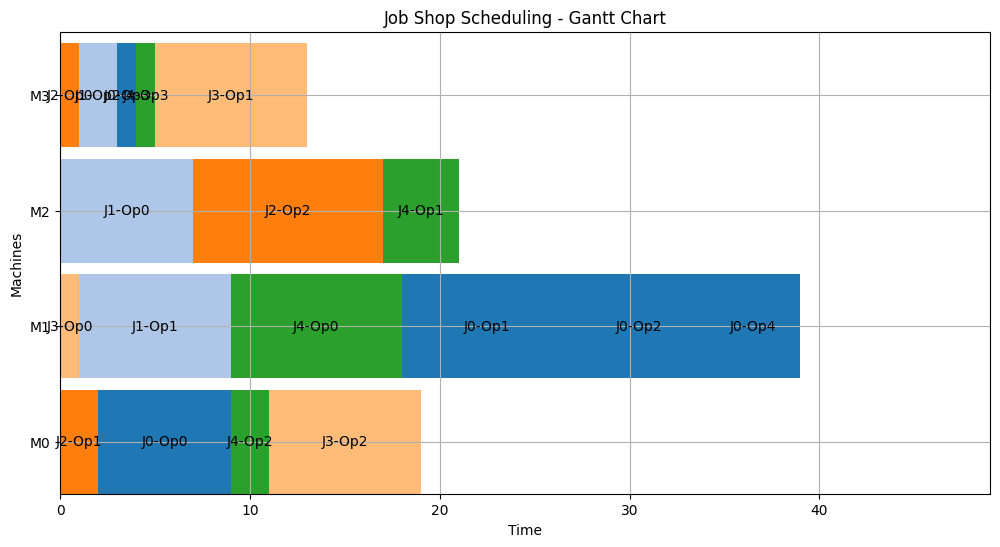

In [52]:
# Test the trained agent
state = env.reset()
done = False
total_reward = 0

while not done:
    available_ops = env._get_available_ops()
    if len(available_ops) == 0:
        break
    available_indices = [env.op_id_to_idx[op.op_id] for op in available_ops]
    op_idx_to_op = {env.op_id_to_idx[op.op_id]: op for op in available_ops}
    action_idx, _, _ = agent.select_action(state, available_indices)
    op = op_idx_to_op[action_idx]
    next_state, reward, done, _ = env.step(op)
    state = next_state
    total_reward += reward

makespan_rl = -total_reward
print(f"Test Makespan: {makespan_rl}")

schedule_rl = env.schedule

# Plot the Gantt chart
plot_gantt_chart(schedule_rl, env.num_machines)

# Solution Comparison

In [53]:
# Collect makespans and schedules
results = {
    'Genetic Algorithm': {
        'makespan': best_makespan_ga,
        'schedule': best_schedule_ga
    },
    'Differential Evolution': {
        'makespan': best_makespan_de,
        'schedule': best_schedule_de
    },
    'Simulated Annealing': {
        'makespan': best_makespan_sa,
        'schedule': best_schedule_sa
    },
    'Particle Swarm Optimization': {
        'makespan': best_makespan_pso,
        'schedule': best_schedule_pso
    },
    'GNN with Reinforcement Learning': {
        'makespan': makespan_rl,
        'schedule': schedule_rl
    }
}

# Create DataFrame
df_results = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Makespan': [results[alg]['makespan'] for alg in results]
})

# Sort DataFrame by Makespan
df_results = df_results.sort_values(by='Makespan', ascending=False)

# Display the DataFrame
display(df_results)

,Algorithm,Makespan
4,GNN with Reinforcement Learning,240
2,Simulated Annealing,41
3,Particle Swarm Optimization,27
0,Genetic Algorithm,17
1,Differential Evolution,12


In [54]:
# Determine best algorithm
best_algorithm = df_results.loc[df_results['Makespan'].idxmin()]['Algorithm']
best_makespan = df_results['Makespan'].min()

# Print results
print("Comparison of Algorithms:")
print(df_results.to_string(index=False))
print(f"\nBest Algorithm: {best_algorithm} with a makespan of {best_makespan}")

Comparison of Algorithms:
                      Algorithm  Makespan
GNN with Reinforcement Learning       240
            Simulated Annealing        41
    Particle Swarm Optimization        27
              Genetic Algorithm        17
         Differential Evolution        12

Best Algorithm: Differential Evolution with a makespan of 12


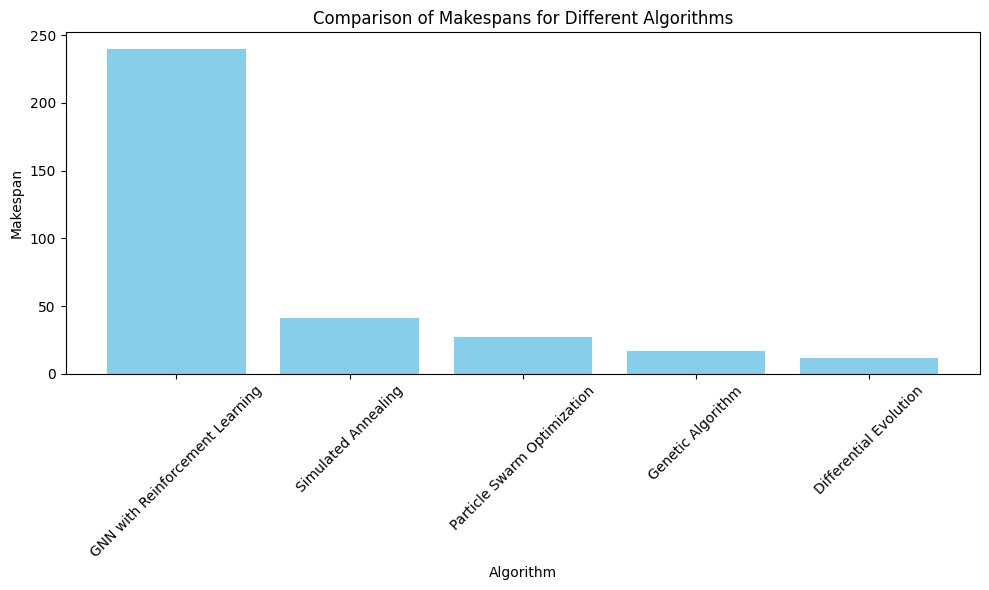

In [55]:
# Plot makespans
plt.figure(figsize=(10,6))
plt.bar(df_results['Algorithm'], df_results['Makespan'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Makespan')
plt.title('Comparison of Makespans for Different Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()